In [37]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sbn
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder
import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline

In [38]:
train_data=pd.read_csv('C:/Users/imadi/OneDrive/Desktop/fraudTrain.csv')
test_data=pd.read_csv('C:/Users/imadi/OneDrive/Desktop/fraudTest.csv')

In [39]:
# amt column is removed because of zero variance 
train_data.drop(columns=['Unnamed: 0','first', 'last', 'street', 'city','trans_date_trans_time','trans_num','dob','amt'],inplace=True)
test_data.drop(columns=['Unnamed: 0','first', 'last', 'street', 'city','trans_date_trans_time','trans_num','dob','amt'],inplace=True)
train_data.head()

,cc_num,merchant,category,gender,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,F,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,F,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,38859492057661,fraud_Lind-Buckridge,entertainment,M,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,M,MT,59632,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0
4,375534208663984,fraud_Keeling-Crist,misc_pos,M,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0


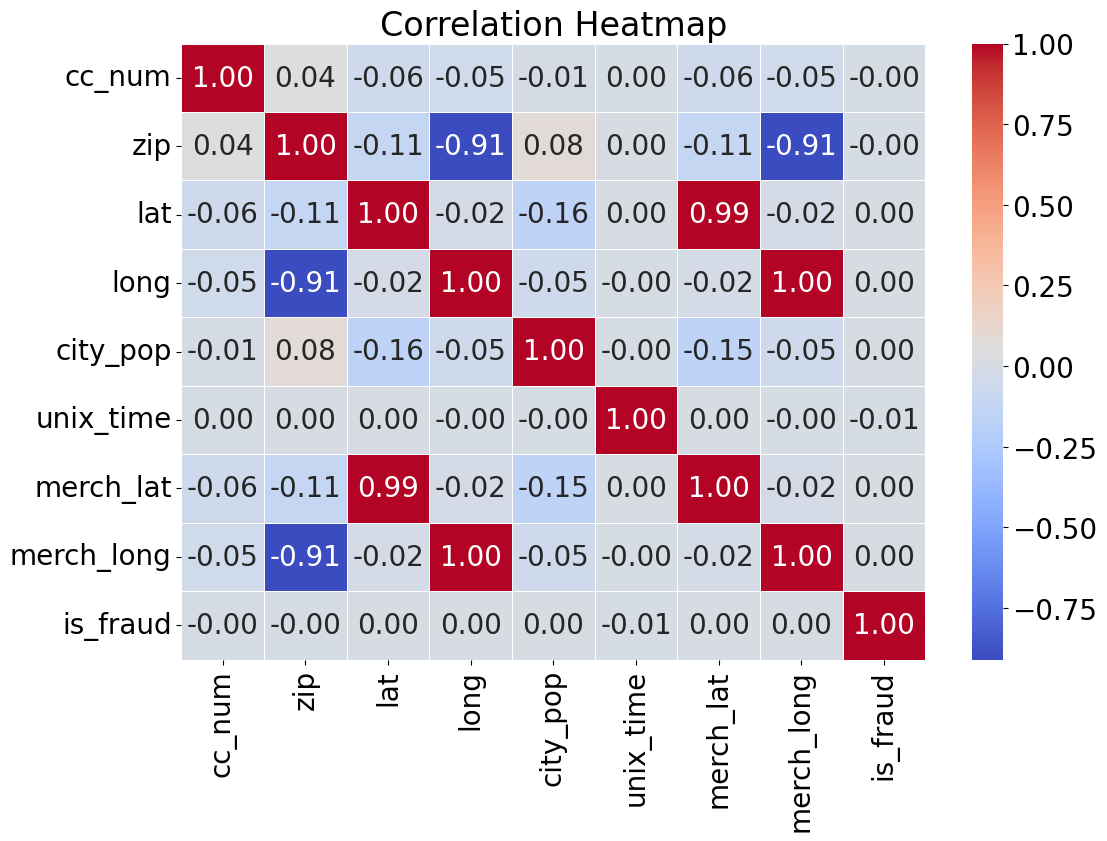

In [47]:
# Drop non-numeric columns
numeric_data = train_data.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting a heatmap
plt.figure(figsize=(12, 8))
sbn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [40]:
total = pd.concat([test_data,train_data])
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column      Dtype  
---  ------      -----  
 0   cc_num      int64  
 1   merchant    object 
 2   category    object 
 3   gender      object 
 4   state       object 
 5   zip         int64  
 6   lat         float64
 7   long        float64
 8   city_pop    int64  
 9   job         object 
 10  unix_time   int64  
 11  merch_lat   float64
 12  merch_long  float64
 13  is_fraud    int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 212.0+ MB


In [41]:
total["is_fraud_cat"]=total.is_fraud.apply(lambda x: "T" if x==1 else "F")
total["is_fraud_cat"].astype("object")

0          F
1          F
2          F
3          F
4          F
          ..
1296670    F
1296671    F
1296672    F
1296673    F
1296674    F
Name: is_fraud_cat, Length: 1852394, dtype: object

In [42]:
totalcat=total.select_dtypes(include=['object'])

In [43]:
total[totalcat.columns]

,merchant,category,gender,state,job,is_fraud_cat
0,fraud_Kirlin and Sons,personal_care,M,SC,Mechanical engineer,F
1,fraud_Sporer-Keebler,personal_care,F,UT,"Sales professional, IT",F
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,F,NY,"Librarian, public",F
3,fraud_Haley Group,misc_pos,M,FL,Set designer,F
4,fraud_Johnston-Casper,travel,M,MI,Furniture designer,F
...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,M,UT,Geoscientist,F
1296671,fraud_Abernathy and Sons,food_dining,M,MD,"Production assistant, television",F
1296672,fraud_Stiedemann Ltd,food_dining,M,NM,Naval architect,F
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,M,SD,Volunteer coordinator,F


In [7]:
encoder = LabelEncoder()
train_data["merchant"] = encoder.fit_transform(train_data["merchant"])
train_data["category"] = encoder.fit_transform(train_data["category"])
train_data["gender"] = encoder.fit_transform(train_data["gender"])
train_data["job"] = encoder.fit_transform(train_data["job"])
train_data["state"] = encoder.fit_transform(train_data["state"])
test_data["merchant"] = encoder.fit_transform(test_data["merchant"])
test_data["category"] = encoder.fit_transform(test_data["category"])
test_data["gender"] = encoder.fit_transform(test_data["gender"])
test_data["job"] = encoder.fit_transform(test_data["job"])
test_data["state"] = encoder.fit_transform(test_data["state"])

In [8]:
X = train_data.drop(['is_fraud'], axis=1)
y = train_data['is_fraud']
X1 = test_data.drop(['is_fraud'], axis=1)
y1 = test_data['is_fraud']


In [9]:
clf = GridSearchCV(LogisticRegression(solver='liblinear', multi_class='auto'), {
    'C': [1,10,20],
}, cv=5, return_train_score=False)
clf.fit(X, y)
clf.cv_results_
train_data1 = pd.DataFrame(clf.cv_results_)
train_data1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.540826,1.366770,0.090122,0.013816,1,{'C': 1},0.994212,0.994212,0.994212,0.994212,0.994208,0.994211,0.000002,1
1,3.403794,0.293611,0.075791,0.009263,10,{'C': 10},0.994212,0.994212,0.994212,0.994212,0.994208,0.994211,0.000002,1
2,3.691948,0.286957,0.104748,0.027058,20,{'C': 20},0.994212,0.994212,0.994212,0.994212,0.994208,0.994211,0.000002,1


In [10]:
from sklearn.metrics import accuracy_score
Model1=LogisticRegression(solver='liblinear', multi_class='auto',C=10)
Model1.fit(X, y)
y_pred = Model1.predict(X1)
accuracy = accuracy_score(y1, y_pred)
print("Accuracy:", accuracy)
score=[]
score.append(accuracy)
score

Accuracy: 0.9961401355721147


[0.9961401355721147]

In [14]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Shape of X:", X1.shape)
print("Shape of y:", y1.shape)

Shape of X: (1296675, 13)
Shape of y: (1296675,)
Shape of X: (555719, 13)
Shape of y: (555719,)


In [16]:
rs = RandomForestClassifier()
rs.fit(X,y)
y_pred = rs.predict(X1)


In [17]:
accuracy = accuracy_score(y1, y_pred)
print("Accuracy:", accuracy)
score.append(accuracy)
score

Accuracy: 0.9951900150975583


[0.9961401355721147, 0.9951900150975583]

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
rs = RandomForestClassifier()
rs.fit(X, y)
y_pred = rs.predict(X1)
accuracy = accuracy_score(y1, y_pred)
print("Accuracy:", accuracy)
score[1]=0.9938982397285364
score

Accuracy: 0.995163023038622


[0.9961401355721147, 0.9938982397285364]

In [19]:
clf = GridSearchCV(tree.DecisionTreeClassifier(random_state=0), {
            'criterion': ['gini', 'entropy']
,
}, cv=10, return_train_score=False)
clf.fit(X, y)
clf.cv_results_
train_data3 = pd.DataFrame(clf.cv_results_)
train_data3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,56.698175,12.065280,0.065130,0.026051,gini,{'criterion': 'gini'},0.006,0.506200,0.370076,0.743476,0.964270,0.985278,0.991833,0.944627,0.941604,0.006216,0.645958,0.379034,1
1,69.918002,3.458807,0.075137,0.016768,entropy,{'criterion': 'entropy'},0.006,0.417374,0.311719,0.661944,0.957916,0.979956,0.992774,0.966607,0.907185,0.037473,0.623895,0.379389,2


In [20]:
Dtree=tree.DecisionTreeClassifier(random_state=0,criterion='entropy',splitter="best")
Dtree.fit(X, y)
y_pred = Dtree.predict(X1)
accuracy = accuracy_score(y1, y_pred)
print("Accuracy:", accuracy)
score.append(accuracy)

Accuracy: 0.9815068406874697


In [21]:
plt.rcParams["figure.figsize"] = (20,15)

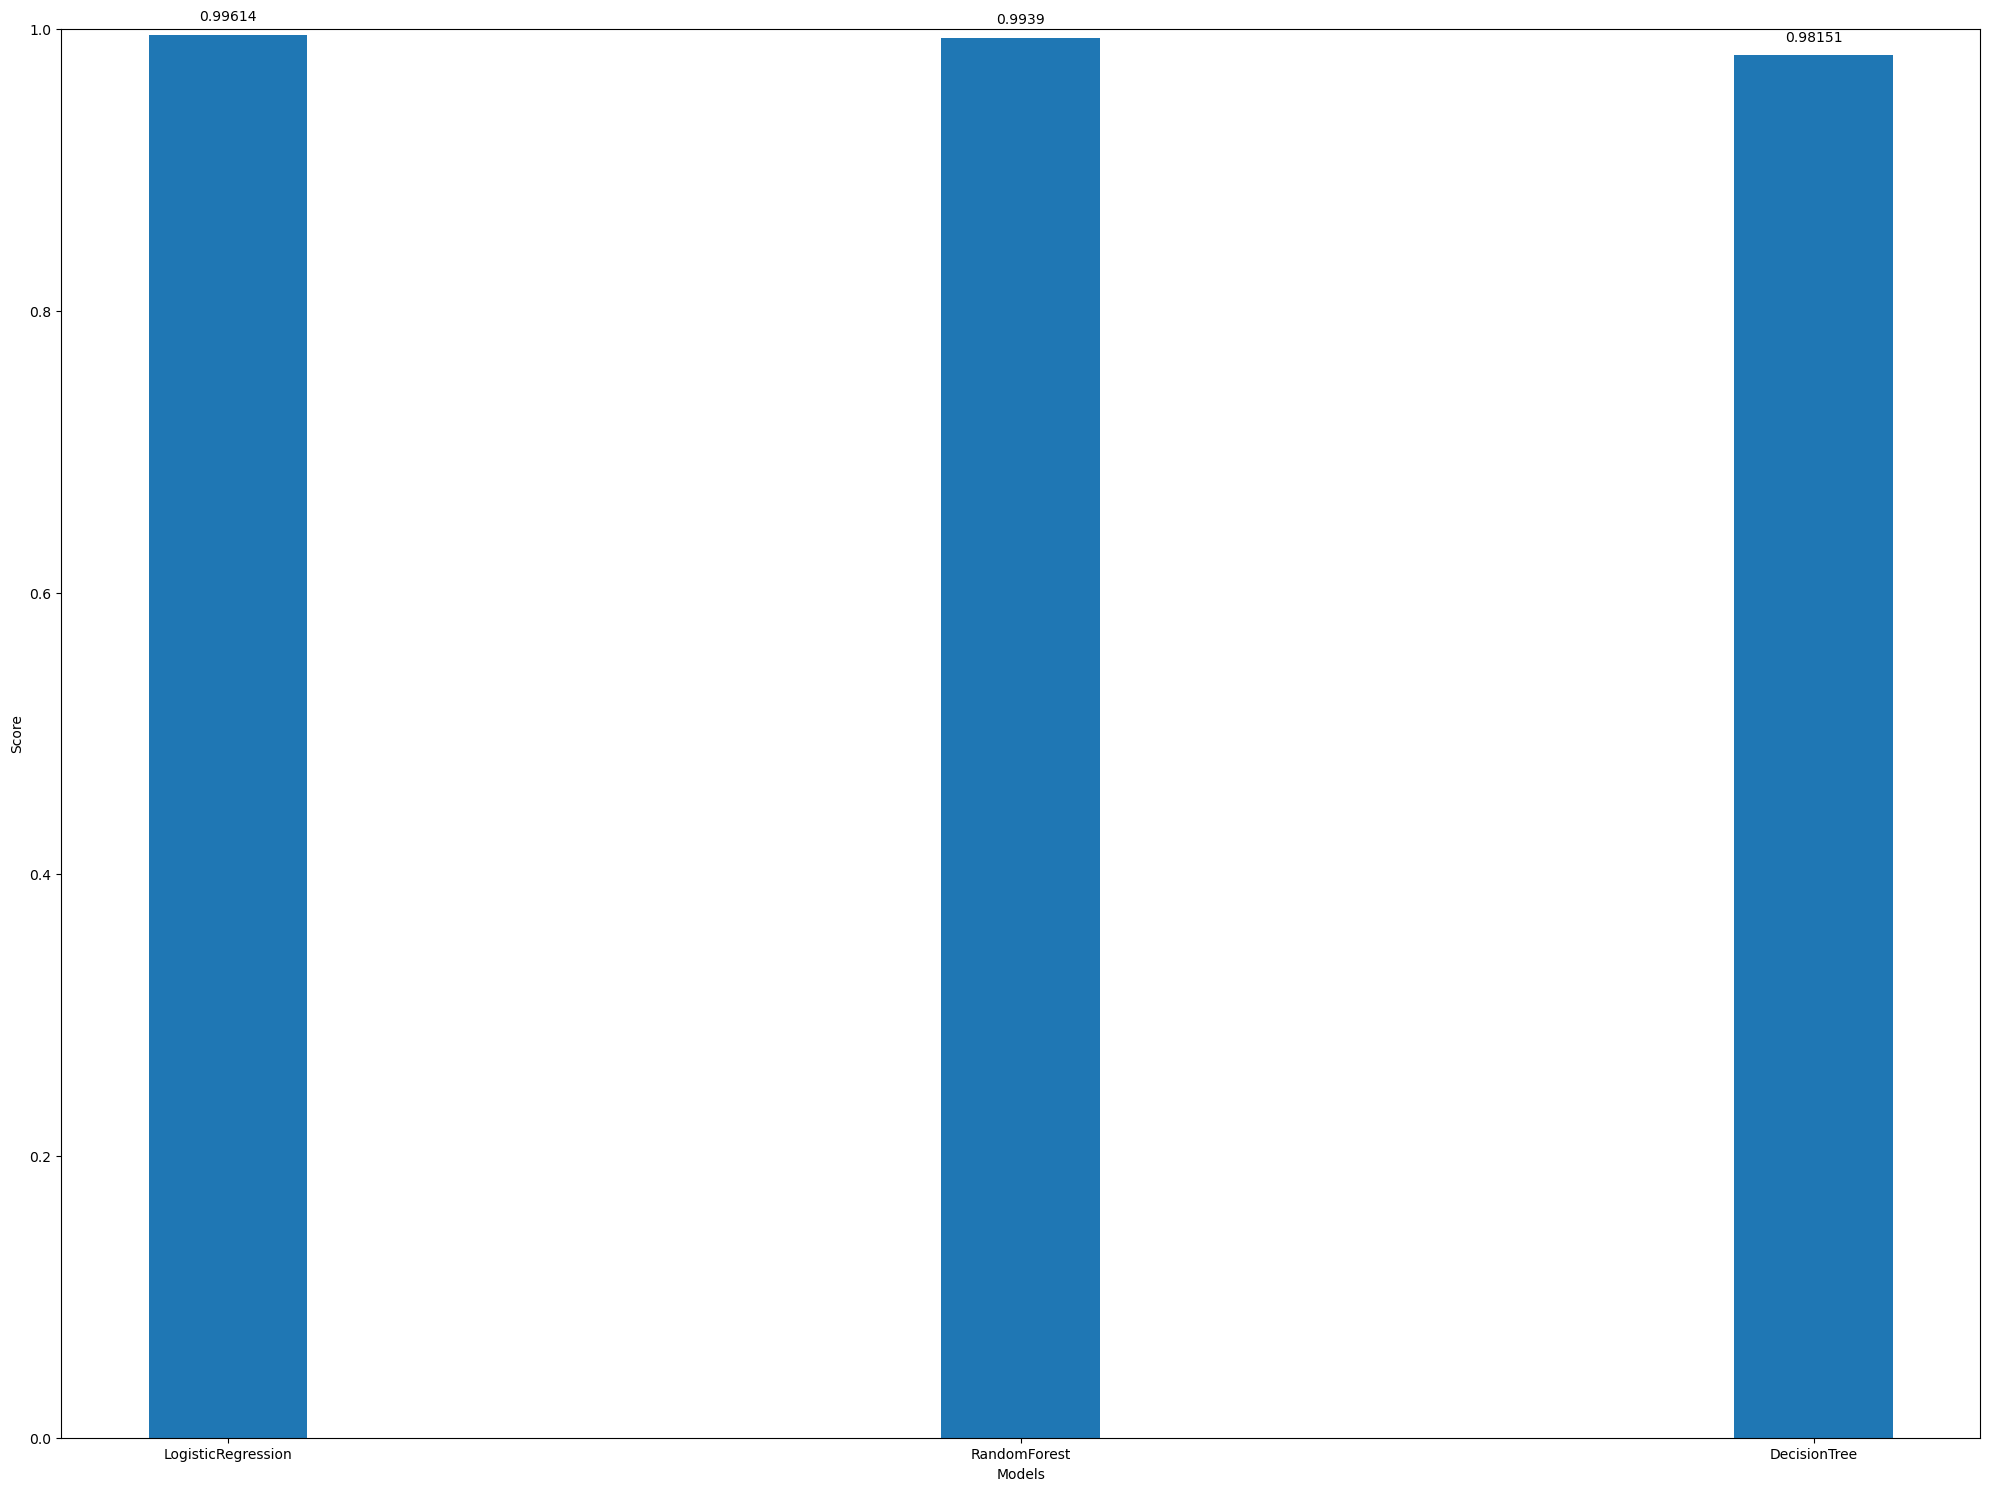

In [22]:
import matplotlib.pyplot as plt
import numpy as np

Models = ['LogisticRegression', 'RandomForest', 'DecisionTree']
y = score

fig, ax = plt.subplots()

x = np.arange(len(Models))

ax.bar(x, y, width=0.2)
ax.set_xticks(x)
ax.set_xticklabels(Models)
ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_ylim(0, 1.0)  # Adjust the y-axis limit based on your data range

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.01 , s=str(round(value, 5)), ha='center')

plt.tight_layout()
plt.show()